In [1]:
import pandas as pd
import os
import math      
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt 
import time
import warnings 
import seaborn as sns 
warnings.filterwarnings('ignore') 

In [8]:
if not os.path.exists('../../dataSet/GT3X-V2.8-00/T_data.csv') & True:
    file_name = []
    for file in tqdm(os.listdir('../../dataSet/GT3X-V2.8-00/GT3X-V2.8-00/T/')):
        if 'IDNO' in file:
            path = '../../dataSet/GT3X-V2.8-00/GT3X-V2.8-00/T/'+file 
            fr = open(path,'rb') 
            next(fr) #迭代从下一行
            next(fr) #从第三行读取数据,
            with open('../../dataSet/GT3X-V2.8-00/T_data.csv','ab') as f: 
                 f.write(fr.read())  
                 fr = open(path) 
                 file_name += len(fr.readlines()) * [path] 

In [9]:
if not os.path.exists('../../dataSet/GT3X-V2.8-00/B_data.csv') & True:
     file_name = []
     for file in tqdm(os.listdir('../../dataSet/GT3X-V2.8-00/GT3X-V2.8-00/B/')): 
         if 'IDNO' in file: 
             path = '../../dataSet/GT3X-V2.8-00/GT3X-V2.8-00/B/'+file 
 #             print(path) 
             fr = open(path,'rb') 
             next(fr) #迭代从下一行
             next(fr) #从第三行读取数据,
             with open('../../dataSet/GT3X-V2.8-00/B_data.csv','ab') as f: 
                 f.write(fr.read())  
             fr = open(path) 
             file_name += len(fr.readlines()) * [path] 

In [5]:
# 读取数据
B_data=pd.read_csv("../../dataSet/GT3X-V2.8-00/B_data.csv")
T_data=pd.read_csv("../../dataSet/GT3X-V2.8-00/T_data.csv")

In [6]:
B_data.head() 

,Component ID,PAD ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Barcode,Result,Panel,Image,Unnamed: 11
0,1:C2,1,98.832,106.662,92.660,0.005,0.000,NaN,GOOD,1,NaN,NaN
1,1:C2,2,95.402,100.189,95.222,0.000,0.000,NaN,GOOD,1,NaN,NaN
2,1:C10,3,103.047,111.748,92.214,-0.011,0.007,NaN,GOOD,1,NaN,NaN
3,1:C10,4,105.500,117.418,89.850,0.000,0.007,NaN,GOOD,1,NaN,NaN
4,1:C11,5,103.741,117.714,88.129,-0.008,-0.006,NaN,GOOD,1,NaN,NaN


In [7]:
T_data.head() 

,Component ID,PAD ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Barcode,Result,Panel,Image,Unnamed: 11
0,1:C1,1,109.000,110.091,99.008,-0.002,0.005,NaN,GOOD,1,NaN,NaN
1,1:C1,2,104.116,116.925,89.045,-0.006,0.005,NaN,GOOD,1,NaN,NaN
2,1:C3,3,109.883,115.214,95.373,0.003,0.001,NaN,GOOD,1,NaN,NaN
3,1:C3,4,114.777,119.189,96.298,0.003,0.006,NaN,GOOD,1,NaN,NaN
4,1:C4,5,114.009,115.141,99.017,-0.010,0.014,NaN,GOOD,1,NaN,NaN


In [8]:
B_data=B_data.drop(["PAD ID","Barcode","Image" ,"Unnamed: 11"],axis=1)# 删除没有用的列
T_data=T_data.drop(["PAD ID","Barcode","Image" ,"Unnamed: 11"],axis=1) 

In [9]:
B_data[B_data["Result"]=="Result"]

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel
4220,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel
8441,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel
12662,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel
16883,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel
21104,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel
...,...,...,...,...,...,...,...,...
6538328,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel
6542549,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel
6546770,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel
6550991,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel


In [10]:
B_data=B_data[B_data["Result"]!="Result"]
T_data=T_data[T_data["Result"]!="Result"]

In [14]:
B_data.value_counts("Result")

Result
GOOD          6556479
E.Insuffi.       1366
E.Position         21
E.Bridging          8
E.HeightU           3
E.AreaL             1
E.Exessive          1
E.Shape             1
dtype: int64

In [15]:
T_data.value_counts("Result")

Result
GOOD          8288834
E.Insuffi.       7979
E.Exessive        360
E.Position        217
E.Bridging         39
E.AreaL             8
E.Shape             2
E.HeightU           1
dtype: int64

In [9]:
#查看样本缺失
B_data.isnull().sum()

Component ID    0
Volume(%)       0
Height(um)      0
Area(%)         0
OffsetX(mm)     0
OffsetY(mm)     0
Result          0
Panel           0
dtype: int64

In [10]:
B_data.isna().sum()

Component ID    0
Volume(%)       0
Height(um)      0
Area(%)         0
OffsetX(mm)     0
OffsetY(mm)     0
Result          0
Panel           0
dtype: int64

In [16]:
B_data["Result"]=B_data["Result"].apply(lambda x: 1 if x=="GOOD"  else 0)
T_data["Result"]=T_data["Result"].apply(lambda x: 1 if x=="GOOD"  else 0)

In [12]:
 T_data.head()

,Component ID,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel
0,1:C1,109.000,110.091,99.008,-0.002,0.005,1,1
1,1:C1,104.116,116.925,89.045,-0.006,0.005,1,1
2,1:C3,109.883,115.214,95.373,0.003,0.001,1,1
3,1:C3,114.777,119.189,96.298,0.003,0.006,1,1
4,1:C4,114.009,115.141,99.017,-0.010,0.014,1,1


In [13]:
B_data.value_counts("Result")

Result
1    6556479
0       1401
dtype: int64

<AxesSubplot:ylabel='None'>

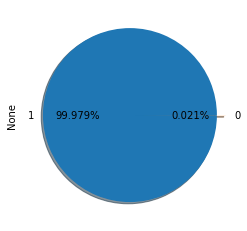

In [14]:
B_data.value_counts("Result").plot(kind="pie",autopct="%1.3f%%",shadow=True,explode=[0,0.1])

In [15]:
B_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6557880 entries, 0 to 6559432
Data columns (total 8 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Component ID  object
 1   Volume(%)     object
 2   Height(um)    object
 3   Area(%)       object
 4   OffsetX(mm)   object
 5   OffsetY(mm)   object
 6   Result        int64 
 7   Panel         object
dtypes: int64(1), object(7)
memory usage: 450.3+ MB


In [17]:
cols=["Volume(%)","Height(um)","Area(%)" , "OffsetX(mm)" ,"OffsetY(mm)" ,"Panel"]
for col in tqdm(cols):  
    B_data[col] = B_data[col].astype(float)
    T_data[col] = T_data[col].astype(float)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:34<00:00,  5.70s/it]


In [17]:
B_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6557880 entries, 0 to 6559432
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Component ID  object 
 1   Volume(%)     float64
 2   Height(um)    float64
 3   Area(%)       float64
 4   OffsetX(mm)   float64
 5   OffsetY(mm)   float64
 6   Result        int64  
 7   Panel         float64
dtypes: float64(6), int64(1), object(1)
memory usage: 450.3+ MB


In [19]:
B_data.describe() 

,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel
count,6.557880e+06,6.557880e+06,6.557880e+06,6.557880e+06,6.557880e+06,6.557880e+06,6.557880e+06
mean,1.039985e+02,1.110993e+02,9.964610e+01,-1.813802e-03,9.221980e-03,9.997864e-01,5.500000e+00
std,1.318588e+01,8.986011e+00,9.766828e+00,8.589230e-03,1.557765e-02,1.461474e-02,2.872282e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.490000e-01,-1.170000e-01,0.000000e+00,1.000000e+00
25%,9.493500e+01,1.050500e+02,9.299300e+01,-7.000000e-03,-2.000000e-03,1.000000e+00,3.000000e+00
50%,1.033630e+02,1.110430e+02,1.018870e+02,-2.000000e-03,6.000000e-03,1.000000e+00,5.500000e+00
75%,1.123760e+02,1.169960e+02,1.071800e+02,4.000000e-03,1.700000e-02,1.000000e+00,8.000000e+00
max,1.858140e+02,1.893380e+02,1.477700e+02,4.500000e-02,1.130000e-01,1.000000e+00,1.000000e+01


In [21]:
T_data.describe() 

,Volume(%),Height(um),Area(%),OffsetX(mm),OffsetY(mm),Result,Panel
count,8.297440e+06,8.297440e+06,8.297440e+06,8.297440e+06,8.297440e+06,8.297440e+06,8.297440e+06
mean,1.088796e+02,1.088448e+02,1.029574e+02,2.296370e-03,3.452478e-03,9.989628e-01,1.473752e+00
std,1.513497e+01,1.238326e+01,7.538291e+00,1.076250e-02,1.412739e-02,3.218869e-02,1.666130e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-3.410000e-01,-2.680000e-01,0.000000e+00,1.000000e+00
25%,9.851400e+01,1.004700e+02,9.935500e+01,-5.000000e-03,-5.000000e-03,1.000000e+00,1.000000e+00
50%,1.088060e+02,1.089980e+02,1.037810e+02,2.000000e-03,2.000000e-03,1.000000e+00,1.000000e+00
75%,1.196670e+02,1.172330e+02,1.073020e+02,8.000000e-03,1.000000e-02,1.000000e+00,1.000000e+00
max,5.298260e+02,2.401540e+02,3.222470e+02,2.880000e-01,3.890000e-01,1.000000e+00,1.000000e+01


### 可视化数据的分布 

1、箱式图 

<AxesSubplot:>

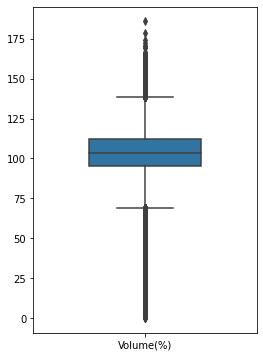

In [25]:
fig=plt.figure(figsize=(4,6))
sns.boxplot(data=B_data[['Volume(%)']],orient="v",width=0.5) 

  查看所有数据的偏离值 

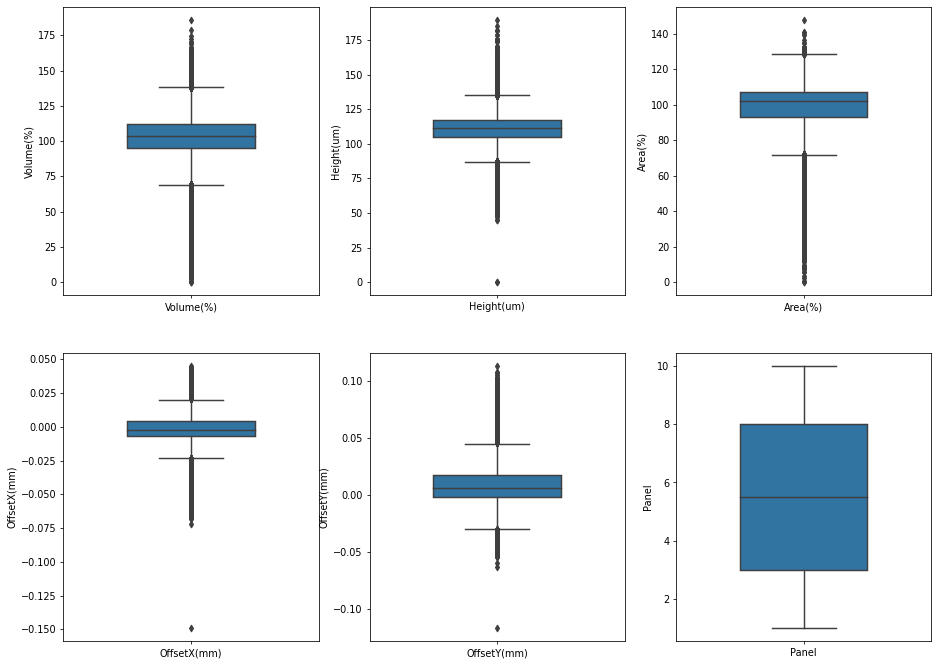

In [26]:
fig=plt.figure(figsize=(16,12),dpi=70)
for i in range(len(cols)):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=B_data[[cols[i]]],orient="v",width=0.5) 
    plt.ylabel(cols[i])
plt.show()

直方图与QQ图

查看点是否处于正态分布，

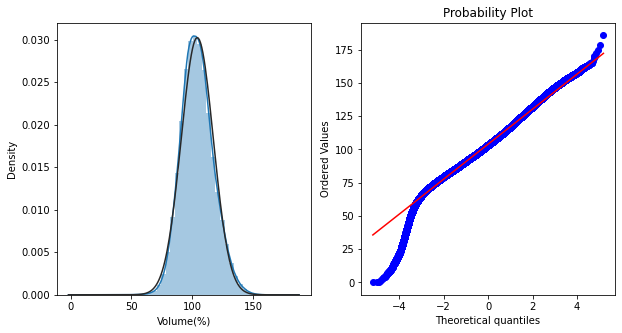

In [29]:
from scipy import stats
fig=plt.figure(figsize=(10,5))
ax=plt.subplot(1,2,1)
sns.distplot(B_data['Volume(%)'],fit=stats.norm)
ax=plt.subplot(1,2,2)
res=stats.probplot(B_data["Volume(%)"],plot=plt)

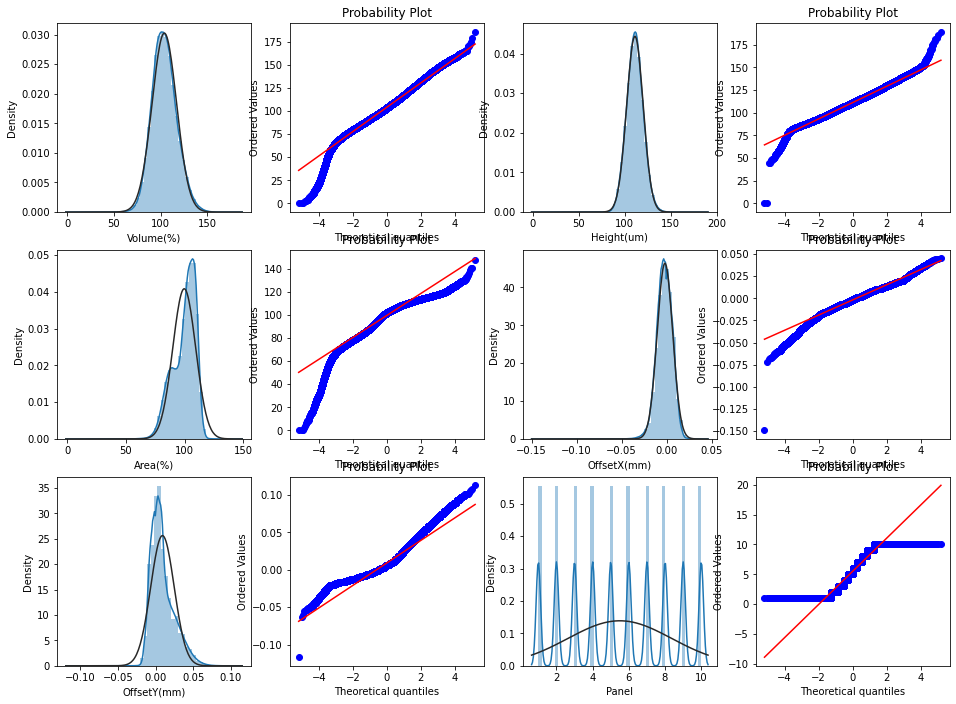

In [23]:
from scipy import stats
i=0
plt.figure(figsize=(16,16))
for col in  cols:
    i+=1
    ax=plt.subplot(4,4,i)
    sns.distplot(B_data[col],fit=stats.norm)
    i+=1
    ax=plt.subplot(4,4,i)
    res=stats.probplot(B_data[col],plot=plt)
plt.show()

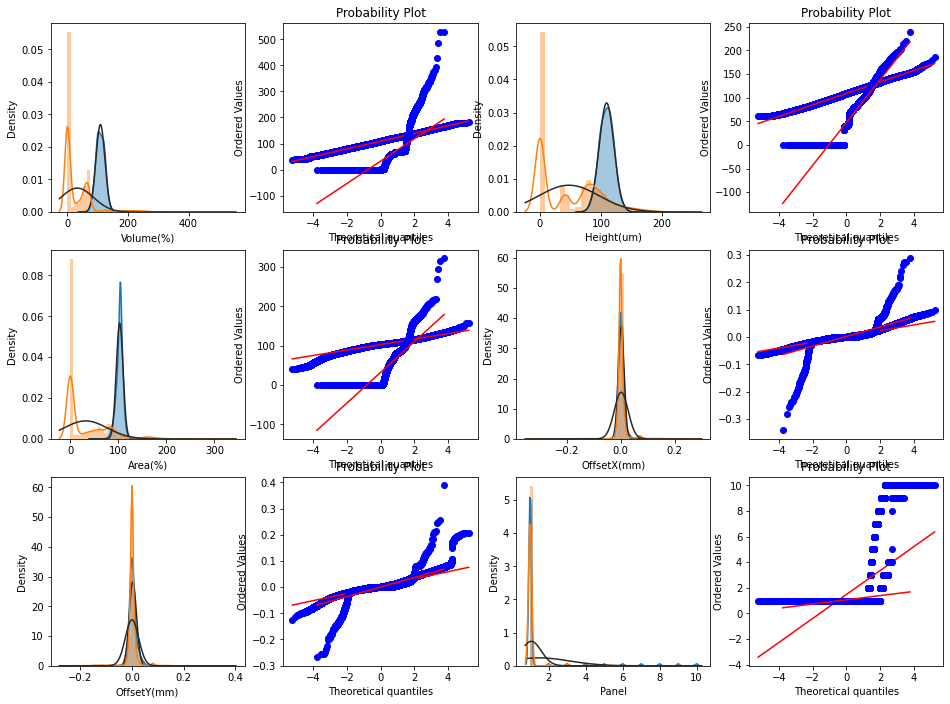

In [24]:
from scipy import stats
cols=["Volume(%)","Height(um)","Area(%)" , "OffsetX(mm)" ,"OffsetY(mm)" ,"Panel"]
i=0
plt.figure(figsize=(16,16))
for col in  cols:
    i+=1
    ax=plt.subplot(4,4,i)
    sns.distplot(T_data[T_data['Result']==1][col],fit=stats.norm)
    sns.distplot(T_data[T_data['Result']!=1][col],fit=stats.norm)
    i+=1
    ax=plt.subplot(4,4,i)
    res=stats.probplot(T_data[T_data['Result']==1][col],plot=plt)
    res=stats.probplot(T_data[T_data['Result']!=1][col],plot=plt)
plt.show()

查看相关系数之间的相关性

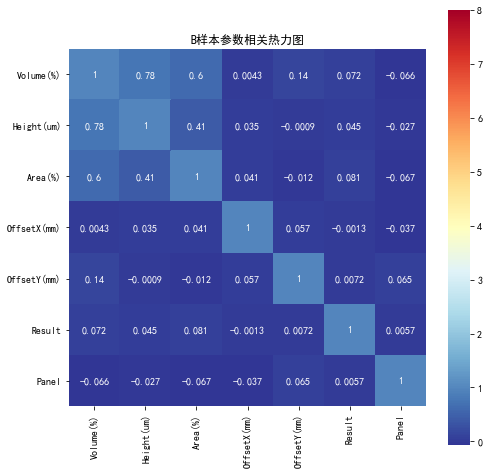

In [35]:
plt.figure(figsize=(8,8))
sns.heatmap(B_data.corr(),vmax=8,square=True,annot=True,cmap='RdYlBu_r')
plt.title("B样本参数相关热力图")
plt.show()

Text(0.5, 1.0, 'T样本参数相关热力图')

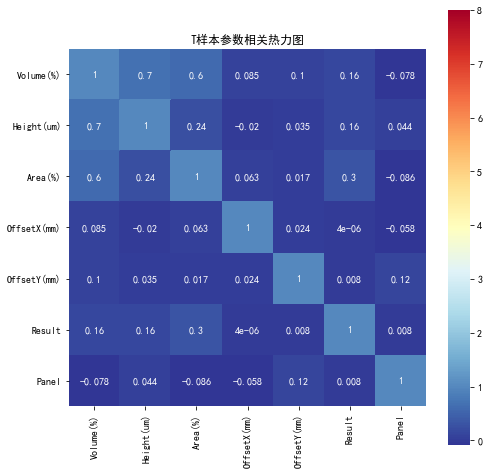

In [33]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(8,8))
sns.heatmap(T_data.corr(),vmax=8,square=True,annot=True,cmap='RdYlBu_r')
plt.title("T样本参数相关热力图")

volume